### **spacy_text_classification : Exercise**


- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [25]:
#uncomment the below line and run this cell to install the large english model which is trained on wikipedia data

# !python -m spacy download en_core_web_lg

In [26]:
#import spacy and load the language model downloaded
import spacy
nlp = spacy.load('en_core_web_sm')

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### **About Data: News Category Classifier**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under **Multi-class** classification Problem.

In [28]:
#import pandas library
import pandas as pd
#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df= pd.read_json(r"D:\MASTERS COURSES\NLP\Assignment\news_dataset.json")
#print the shape of data
print(f'shape of the dataset:  {df.shape}')

#print the top5 rows
print(df.head(5))


shape of the dataset:  (7500, 2)
                                                text  category
0  Larry Nassar Blames His Victims, Says He 'Was ...     CRIME
1       Woman Beats Cancer, Dies Falling From Horse      CRIME
2  Vegas Taxpayers Could Spend A Record $750 Mill...    SPORTS
3  This Richard Sherman Interception Literally Sh...    SPORTS
4  7 Things That Could Totally Kill Weed Legaliza...  BUSINESS


In [29]:
#check the distribution of labels 
df['category'].value_counts()


category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [30]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['category'].map({'CRIME' : 0, 'SPORTS': 1, 'BUSINESS': 2})

#check the results with top 5 rows
df.head(5)



,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


### **Preprocess the text**

In [31]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    document = nlp(text)
    filtered_tokens = []
    for token in document:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [32]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]

df['preprocessed_text'] = df['text'].apply(lambda x: preprocess(x))

In [33]:
#print the top 5 rows
df.head(5)

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


### **Get the spacy embeddings for each preprocessed text**

In [34]:
#create a new column "vector" that store the vector representation of each pre-processed text
df['vector'] = df['preprocessed_text'].apply(lambda x: nlp(x).vector)


In [35]:
#print the top 5 rows
df.head(5)

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.2510492, -0.8912478, 0.16454175, 0.0477233..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse,"[-0.38021612, -0.6863478, -0.16636282, 0.14657..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...,"[-0.510407, -0.78601635, 0.0011513359, 0.46165..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-0.34514984, -0.7098672, -0.23807164, 0.39811..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-0.20529911, -0.3886323, -0.14613569, 0.44984..."


**Train-Test splitting**

In [36]:
from sklearn.model_selection import train_test_split

X = df['vector'].to_numpy()
Y = df['label_num'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



**Reshape the X_train and X_test so as to fit for models**

In [37]:
# import numpy as np
import numpy as np

print('Before: Shape of X_train and X_test:')
print(X_train.shape)
print(X_test.shape)

#reshapes the X_train and X_test using 'stack' function of numpy. Store the result in new variables "X_train_2d" and "X_test_2d"
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

#check the shape of X_train_2d and X_test_2d
print('After: Shape of X_train_2d and X_test_2d:')
print(X_train_2d.shape)
print(X_test_2d.shape)




Before: Shape of X_train and X_test:
(5250,)
(2250,)
After: Shape of X_train_2d and X_test_2d:
(5250, 96)
(2250, 96)


**Attempt 1:**


- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
DTML = DecisionTreeClassifier()
#2. fit with all_train_embeddings and y_train
DTML.fit(X_train_2d, y_train)
#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = DTML.predict(X_test_2d)
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.40      0.41       752
           1       0.43      0.46      0.44       740
           2       0.49      0.49      0.49       758

    accuracy                           0.45      2250
   macro avg       0.45      0.45      0.45      2250
weighted avg       0.45      0.45      0.45      2250



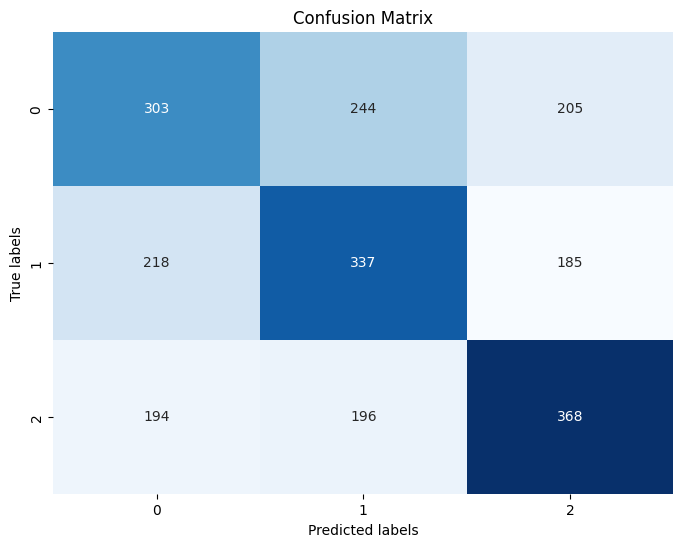

In [39]:
# Calculate confusion matrix For DecisionTree
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Attempt 2:**


- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
m_clf = MultinomialNB()

#2. fit with all_train_embeddings(scaled) and y_train
m_clf.fit(X_train_2d_scaled, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = m_clf.predict(X_test_2d_scaled)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.32      0.40       752
           1       0.51      0.61      0.56       740
           2       0.53      0.63      0.58       758

    accuracy                           0.52      2250
   macro avg       0.52      0.52      0.51      2250
weighted avg       0.52      0.52      0.51      2250



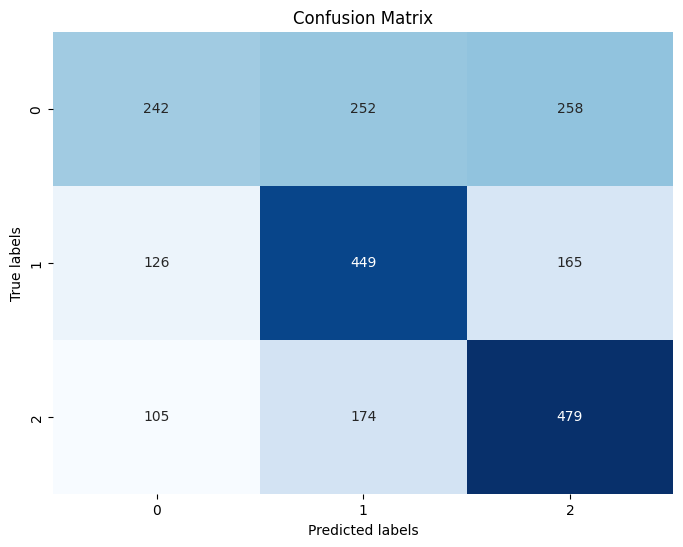

In [41]:
# Calculate confusion matrix MultiNB
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Attempt 3:**


- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [42]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
KNN = KNeighborsClassifier()

#2. fit with all_train_embeddings and y_train
KNN.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = KNN.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.57      0.52       752
           1       0.53      0.44      0.48       740
           2       0.60      0.57      0.59       758

    accuracy                           0.53      2250
   macro avg       0.53      0.53      0.53      2250
weighted avg       0.53      0.53      0.53      2250



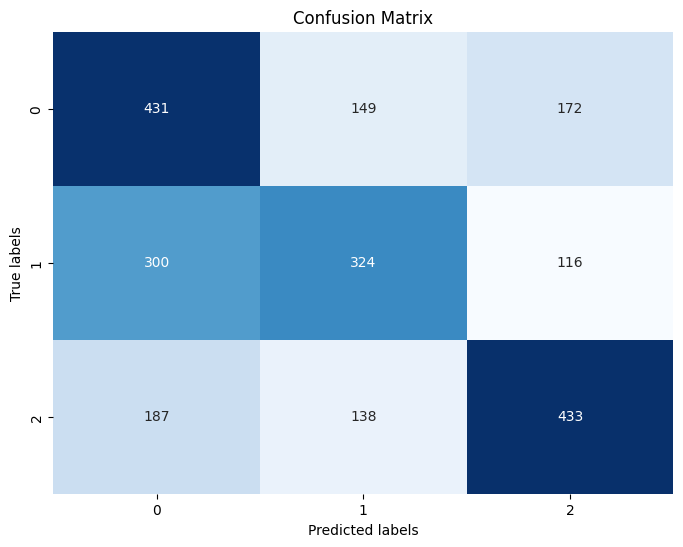

In [43]:
# Calculate confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Attempt 4:**


- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [44]:
from sklearn.ensemble import RandomForestClassifier

#1. creating a Random Forest model object
Rf = RandomForestClassifier()

#2. fit with all_train_embeddings and y_train
Rf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = Rf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.51      0.51       752
           1       0.56      0.61      0.58       740
           2       0.65      0.59      0.62       758

    accuracy                           0.57      2250
   macro avg       0.57      0.57      0.57      2250
weighted avg       0.57      0.57      0.57      2250



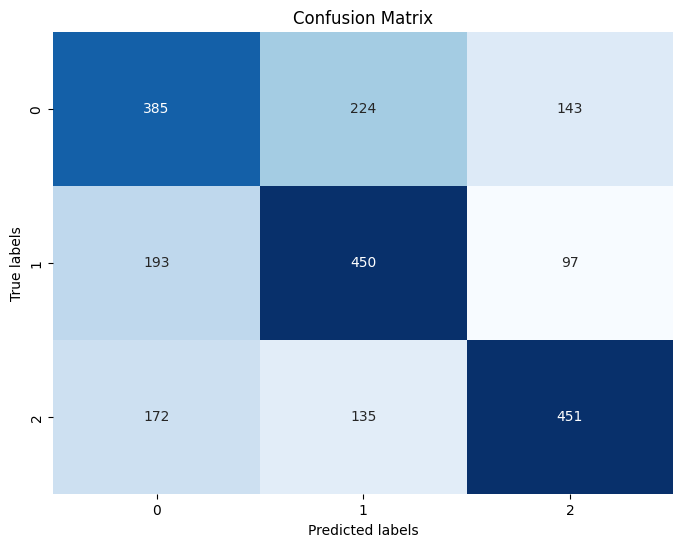

In [45]:
# Calculate confusion matrix for RF
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Attempt 5:**


- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

#1. creating a GradientBoosting model object
gdb = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
gdb.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = gdb.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.57      0.56       752
           1       0.57      0.60      0.59       740
           2       0.66      0.61      0.63       758

    accuracy                           0.59      2250
   macro avg       0.59      0.59      0.59      2250
weighted avg       0.59      0.59      0.59      2250



**Print the confusion Matrix with the best model got**

In [48]:
import numpy as np

# Get the unique classes in y_train
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


Number of classes: 3


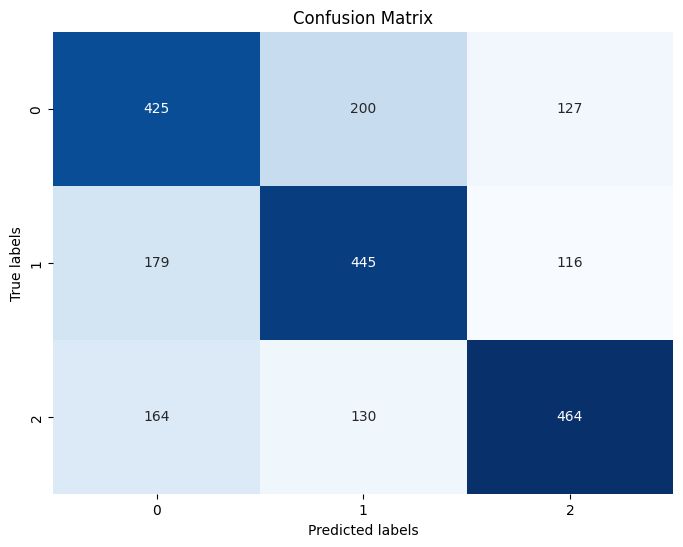

In [47]:
# Calculate confusion matrix for GD
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


